# ZOL中关村手机数据分析

小组成员：张文港，张祎璘

### 项目目的

我们对ZOL中关村的手机数据进行分析，得到了一下三个方面。

1. 整个手机消费市场的状况。
2. 消费者对于手机每一种性能的关注度。
3. 手机的评价和性能是否对制定价格产生的影响。

### 数据来源

我们爬取了ZOL中关村手机界面上所有在销的商品。具体的数据包含：

1. 商品信息：品牌名称，手机名称，价格。
2. 手机参数：主屏尺寸，主屏分辨率，后置摄像头，前置摄像头，电池容量，电池类型，核心数，内存。
3. 评论信息：评论人数，评论总分，性价比、性能、续航、外观、拍照评分，评论内容提取。

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
![img](https://github.com/codeandworld/photo/blob/master/iphone1.PNG?raw=true)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
![img](https://github.com/codeandworld/photo/blob/master/iphone2.PNG?raw=true)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
![img](https://github.com/codeandworld/photo/blob/master/iphone3.PNG?raw=true)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## 1. 手机消费市场的状况

1. 手机价格分布描述
2. 手机品牌生产产品种类描述
3. 手机品牌评论人数分析
4. 手机品牌聚类分析


### 1.1 手机价格分布描述



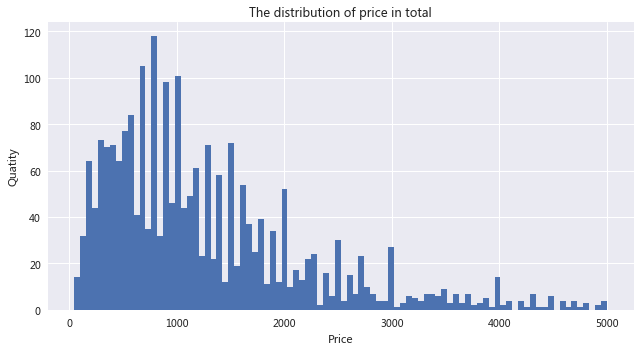

count     2289.000000
mean      1468.736129
std       2100.270967
min         69.000000
25%        599.000000
50%        999.000000
75%       1769.000000
max      50000.000000
Name: price, dtype: float64

In [4]:
# import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import math
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud
from PIL import Image
from matplotlib import ch
ch.set_ch()
%matplotlib inline

# import data
table = pd.read_csv('C:\\Users\\Administrator\\Desktop\\zol_moblie.csv',encoding='gb2312')

# plot the distribution of price in total
num_bins = 90

fig, ax = plt.subplots(figsize=(9,5)) 
n, bins, patches = ax.hist(table["price"], num_bins, range = (50,5000))
ax.set_xlabel('Price')
ax.set_ylabel('Quatity')
ax.set_title('The distribution of price in total')
fig.tight_layout()
plt.show()

# caluculate the basic statistics of price
table["price"].describe()

### 1.2 手机品牌生产产品种类描述

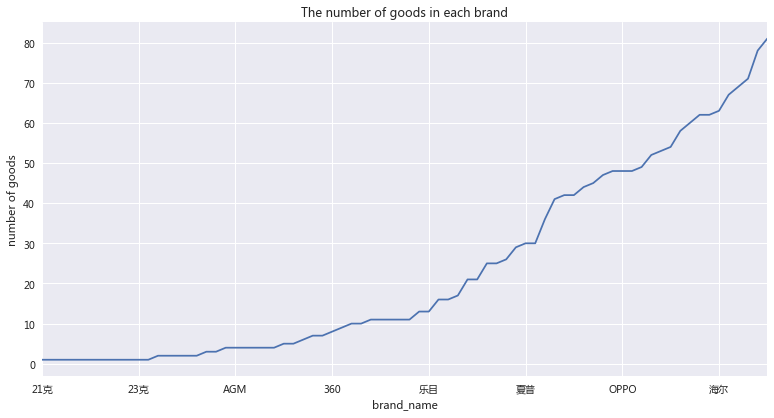

brand_name
21克           1
明基            1
汇威            1
独影天幕          1
uphone        1
manta         1
innos         1
VANO          1
小格雷           1
22克           1
23克           1
Ant           1
同洲            2
格力            2
步步高           2
COMIO         2
imoo          2
VEB           3
奇酷            3
8848          4
AGM           4
Google        4
SOYES         4
PPTV          4
蓝魔            4
一加            5
Lovme         5
锤子科技          6
富可视           7
MANN          7
360           8
松下            9
美图           10
乐视           10
SUGAR        11
大神           11
sonim        11
中国移动         11
Microsoft    11
先锋           13
Name: price, dtype: int64
brand_name
乐目      13
Acer    16
HP      16
苹果      17
魅族      21
荣耀      21
小米      25
努比亚     25
神舟      26
华为      29
夏普      30
长虹      30
HTC     36
华硕      41
黑莓      42
vivo    42
酷派      44
TCL     45
LG      47
诺基亚     48
OPPO    48
Moto    48
三星      49
中兴      52
酷比      53
联想      54
索尼      58
康佳      60
朵唯  

In [9]:
table1 = table.iloc[:,[0,2,78]]
table1 = table1.drop_duplicates(subset=['good_na'])

grouped = table1.groupby('brand_name')
table2 = grouped['price'].agg(np.count_nonzero)
table2 = table2.sort_values(axis=0)

fig, ax = plt.subplots(figsize=(13,6.5)) 
ax.set_xticks(np.linspace(0,70,8))
table2.plot()
ax.set_ylabel('number of goods')
ax.set_title('The number of goods in each brand')
plt.show()

print table2[0:40]
print table2[40:]

### 1.3 手机品牌评论人数分析

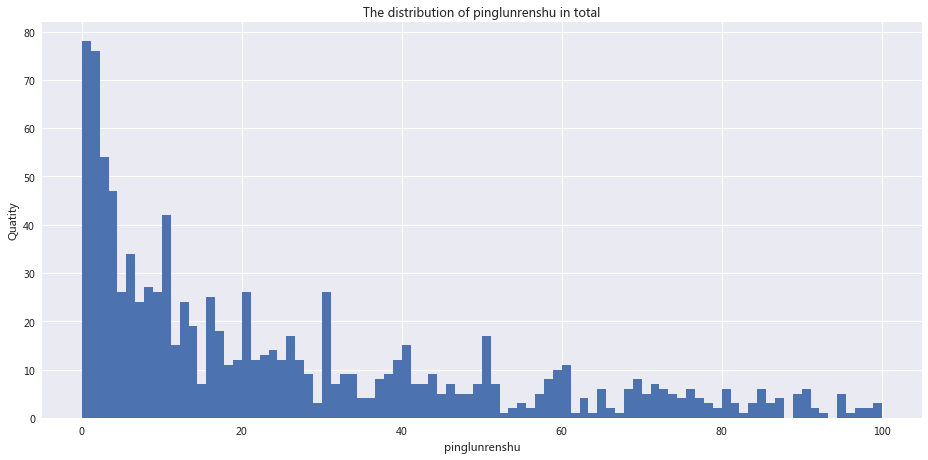

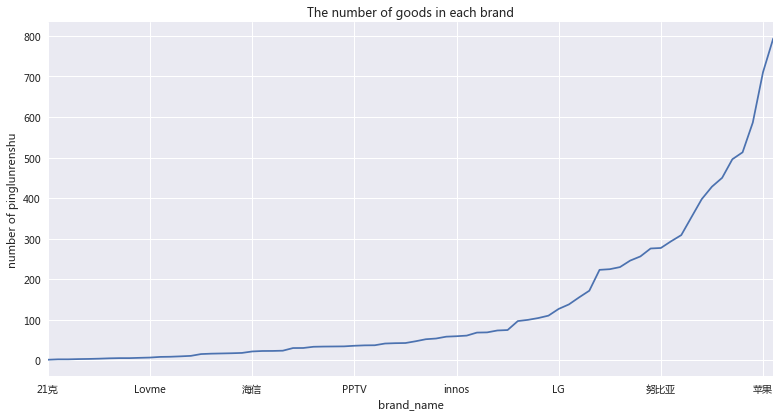

brand_name
21克        1.000000
Ant        2.000000
COMIO      2.000000
长虹         2.625000
小格雷        3.000000
Acer       3.636364
SOYES      4.500000
22克        5.000000
sonim      5.000000
HP         5.750000
Lovme      6.400000
汇威         8.000000
海尔         8.400000
邦华         9.389831
夏普        10.576923
Google    15.000000
AGM       16.000000
imoo      16.500000
纽曼        17.031250
康佳        17.809524
海信        21.431373
富可视       22.571429
MANN      22.714286
VEB       23.333333
先锋        29.846154
步步高       30.000000
manta     33.000000
酷比        33.510638
黑莓        33.731707
独影天幕      34.000000
PPTV      35.500000
飞利浦       36.476923
蓝魔        36.750000
8848      41.000000
TCL       41.860465
朵唯        42.236364
美图        46.600000
天语        51.607843
中兴        53.368421
酷派        57.928571
Name: pinglunrenshu, dtype: float64
brand_name
innos         59.000000
华硕            60.562500
明基            68.000000
同洲            68.500000
中国移动          73.181818
SUGAR         74.27272

In [10]:
table1 = table[["brand_name","good_na","pinglunrenshu"]]
table1 = table1.drop_duplicates(subset=['good_na'])
table1 = table1.dropna()

# plot the distribution of pinglunrenshu in total
num_bins = 90
fig, ax = plt.subplots(figsize=(13,6.5)) 
n, bins, patches = ax.hist(table1["pinglunrenshu"], num_bins, range = (0,100))
ax.set_xlabel("pinglunrenshu")
ax.set_ylabel('Quatity')
ax.set_title('The distribution of pinglunrenshu in total')
fig.tight_layout()
plt.show()

table1["pinglunrenshu"].describe()

# get the distribution of pinglunrenshu in of each brand 
grouped = table1.groupby('brand_name')
table2 = grouped["pinglunrenshu"].agg(np.mean)
table2 = table2.sort_values(axis=0)
# plot the distribution of pinglunrenshu in of each brand
fig, ax = plt.subplots(figsize=(13,6.5)) 
ax.set_xticks(np.linspace(0,70,8))
table2.plot()
ax.set_ylabel('number of pinglunrenshu')
ax.set_title('The number of goods in each brand')
plt.show()

print table2[0:40]
print table2[40:]


### 1.4 手机品牌聚类分析

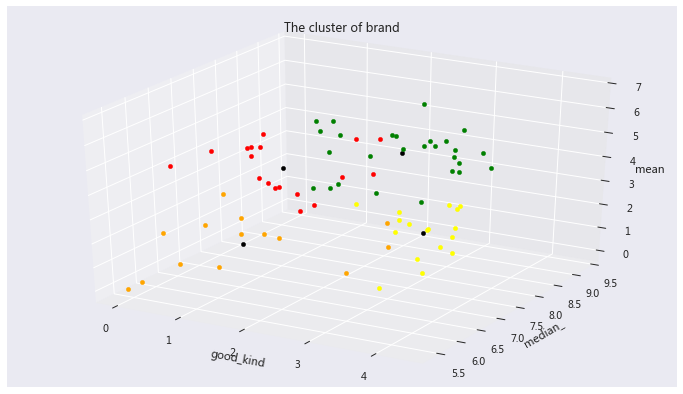

brand_name
独影天幕      0
imoo      0
innos     0
PPTV      0
美图        0
蓝魔        0
manta     0
MANN      0
奇酷        0
步步高       0
VEB       0
格力        0
明基        0
AGM       0
8848      0
富可视       0
同洲        0
Google    0
uphone    1
sonim     1
松下        1
小格雷       1
汇威        1
21克       1
COMIO     1
SOYES     1
22克       1
Lovme     1
23克       1
Acer      1
VANO      1
Ant       1
Name: kind, dtype: int32
brand_name
飞利浦          2
康佳           2
朵唯           2
纽曼           2
酷派           2
海信           2
海尔           2
酷比           2
邦华           2
长虹           2
天语           2
黑莓           2
夏普           2
HP           2
TCL          2
先锋           2
中兴           2
苹果           3
荣耀           3
Moto         3
诺基亚          3
Microsoft    3
LG           3
HTC          3
金立           3
锤子科技         3
360          3
联想           3
OPPO         3
索尼           3
大神           3
神舟           3
vivo         3
一加           3
三星           3
中国移动         3
乐目           3
乐视           3

In [8]:
color_dict = {0:'red', 1:'orange', 2:'yellow', 3:'green', 4:'cyan', 5:'blue', 6:'yellow'}

# get the number of types of each brand, the median of brand price, the mean of review number
table2 = table.iloc[:,[0,2,78]]
table2 = table2.drop_duplicates(subset=['good_na'])
grouped = table2.groupby('brand_name')
table2 = grouped['price'].agg([np.count_nonzero,np.median])
grouped = table.groupby("brand_name")
table3 = grouped["pinglunrenshu"].agg([np.mean])
table4 = pd.concat([table2,table3],axis = 1)

# fill none with 0 and get the log of data
table4["count_nonzero"] = table4["count_nonzero"].map(lambda x: math.log(x))
table4["median"] = table4["median"].map(lambda x: math.log(x))
table4["mean"] = table4["mean"].map(lambda x: math.log(x))
table4 = table4.fillna(0)

# cluster all data
kmeans = KMeans(n_clusters=4, random_state=0).fit(table4.values)
table4['kind'] = kmeans.labels_
table5 = table4['kind']

# get the label of data
la = kmeans.labels_

# plot the result of cluster
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

xs = table4["count_nonzero"].values
ys = table4["median"].values
zs = table4["mean"].values

for i in range(len(xs)):
    ax.scatter(xs[i], ys[i], zs[i], c=color_dict[la[i]])

for i in kmeans.cluster_centers_:
    ax.scatter(i[0], i[1], i[2], c='k')

ax.set_xlabel('good_kind')
ax.set_ylabel('median_')
ax.set_zlabel('mean')
ax.set_title('The cluster of brand')
plt.show()

print table5.sort_values()[0:32]
print table5.sort_values()[32:]

## 2. 消费者对于手机每一种性能的关注度

1. 评论云图
2. 性能评分与总评分的回归

### 2.1 评论云图

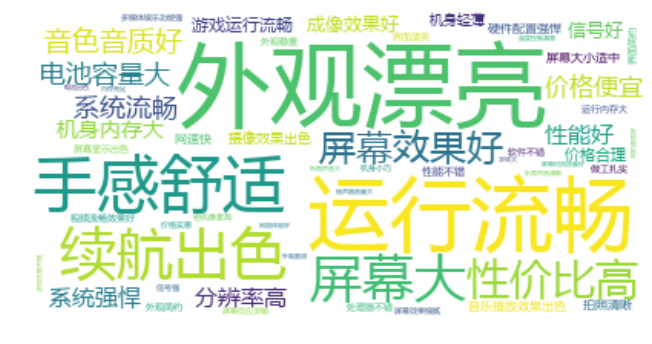

In [7]:
table1 = table.iloc[:,18:76]
table2 = np.append(table1.iloc[:,0:2].values, table1.iloc[:,2:4].values, axis = 0)

for i in range(13):
    table2 = np.append(table2, table1.iloc[:,i*2+4:i*2+6].values, axis = 0)

table2 = pd.DataFrame(table2)
table2 = table2.dropna(axis=0, how='any', subset=[0,1])
table2 = table2.drop(axis=0, labels=[4610,7782,10071,12360,14649,915,3204,5493])
table2[1] = table2[1].map(lambda x: -float(x))

grouped = table2.groupby(0,as_index = False)
table3 = grouped[1].agg(np.sum)

table3 = table3.drop(axis=0, labels=[5,25,17,27,52,53,68,79,100,116,125,32,49,
                                     54,71,80,34,74,111,123,0,129,114,36,93,109,105,
                                     115,48,83,66,104,128,57,84,124,64,20,11,23,
                                     55,10,16,35,51,15,108,94,72,56,63,42,97,47,132,61,
                                     120,24,90,13,7,89,76,4,122,101])
d = {}
for a, x in table3.values:
    d[a] = x
        
cloud = WordCloud(
        #设置字体，不指定就会出现乱码
        font_path="C:\\Users\\Administrator\\Desktop\\vistab.ttf",
        #设置背景色
        background_color='white',
        #最大号字体
        max_font_size=60
    )
cloud.generate_from_frequencies(frequencies=d)

plt.figure(figsize=(11,6.5))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()



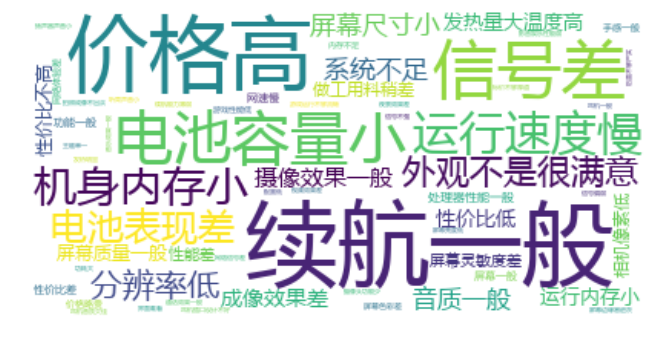

In [8]:
table4 = np.append(table1.iloc[:,18:20].values, table1.iloc[:,20:22].values, axis = 0)
for i in range(27):
    table4 = np.append(table4, table1.iloc[:,i*2+4:i*2+6].values, axis = 0)

table4 = pd.DataFrame(table4)    
table4 = table4.dropna(axis=0, how='any', subset=[0,1]) 
table4 = table4.drop(axis=0, labels=[4610,7782,10071,12360,14649,5493])
table4[1] = table4[1].map(lambda x: -float(x))

grouped = table4.groupby(0)
table5 = grouped[1].agg(np.sum)
table5 = table5.drop(axis=0, labels=list(table3[0].values))
        
cloud = WordCloud(
        #设置字体，不指定就会出现乱码
        font_path="C:\\Users\\Administrator\\Desktop\\vistab.ttf",
        #设置背景色
        background_color='white',
        #最大号字体
        max_font_size=60
    )
cloud.generate_from_frequencies(frequencies=table5.to_dict())

plt.figure(figsize=(11,6.5))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()


### 2.2 性能评分与总评分的关系

In [1]:
otable <- read.csv("C:\\Users\\Administrator\\Desktop\\zol_regresion.csv")

co_regresion <- function(t){
  table <- otable[otable$kind==t,]
  table <- table[4:9]
  table$pingfen<-as.numeric(table$pingfen)
  table$xingjiabi<-as.numeric(table$xingjiabi)
  table$xingneng<-as.numeric(table$xingneng)
  table$xuhang<-as.numeric(table$xuhang)
  table$waiguan<-as.numeric(table$waiguan)
  table$paizhao<-as.numeric(table$paizhao)
  fit <- lm(pingfen ~ xingjiabi+xingneng+xuhang+waiguan+paizhao,data = table)
  summary(fit)
    
  #pairs(~ pingfen+xingjiabi+xingneng+xuhang+waiguan+paizhao,data=table)
  summary(fit) 
  }

co_regresion(0)
co_regresion(1)
co_regresion(2)
co_regresion(3)


Call:
lm(formula = pingfen ~ xingjiabi + xingneng + xuhang + waiguan + 
    paizhao, data = table)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.40476 -0.11559 -0.02908  0.12152  1.06056 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.861774   0.262504   3.283  0.00176 ** 
xingjiabi    0.241649   0.041727   5.791 3.15e-07 ***
xingneng     0.144299   0.024588   5.869 2.36e-07 ***
xuhang       0.240590   0.045289   5.312 1.86e-06 ***
waiguan     -0.003125   0.003495  -0.894  0.37499    
paizhao      0.033827   0.004532   7.463 5.38e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3632 on 57 degrees of freedom
Multiple R-squared:  0.9185,	Adjusted R-squared:  0.9113 
F-statistic: 128.5 on 5 and 57 DF,  p-value: < 2.2e-16



Call:
lm(formula = pingfen ~ xingjiabi + xingneng + xuhang + waiguan + 
    paizhao, data = table)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50720 -0.22837 -0.02607  0.11355  1.13510 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.0257797  0.4618581   2.221  0.04828 * 
xingjiabi    0.2727387  0.1104591   2.469  0.03117 * 
xingneng     0.0399278  0.0920517   0.434  0.67285   
xuhang       0.1898382  0.0807936   2.350  0.03851 * 
waiguan     -0.0001643  0.0080033  -0.021  0.98399   
paizhao      0.0447016  0.0107835   4.145  0.00163 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4846 on 11 degrees of freedom
Multiple R-squared:  0.9537,	Adjusted R-squared:  0.9327 
F-statistic: 45.32 on 5 and 11 DF,  p-value: 5.678e-07



Call:
lm(formula = pingfen ~ xingjiabi + xingneng + xuhang + waiguan + 
    paizhao, data = table)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.32028 -0.28509 -0.06264  0.20548  1.66519 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.645456   0.082558   7.818 3.01e-14 ***
xingjiabi   0.357501   0.014128  25.305  < 2e-16 ***
xingneng    0.196706   0.010172  19.338  < 2e-16 ***
xuhang      0.262912   0.012348  21.292  < 2e-16 ***
waiguan     0.001259   0.001182   1.065    0.287    
paizhao     0.014123   0.001274  11.088  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4201 on 519 degrees of freedom
Multiple R-squared:  0.9235,	Adjusted R-squared:  0.9228 
F-statistic:  1253 on 5 and 519 DF,  p-value: < 2.2e-16



Call:
lm(formula = pingfen ~ xingjiabi + xingneng + xuhang + waiguan + 
    paizhao, data = table)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3024 -0.1779 -0.0255  0.1301  2.8632 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.3206495  0.0767623  17.204  < 2e-16 ***
xingjiabi   0.2553044  0.0108063  23.626  < 2e-16 ***
xingneng    0.1273658  0.0058837  21.647  < 2e-16 ***
xuhang      0.2548168  0.0099166  25.696  < 2e-16 ***
waiguan     0.0037196  0.0008924   4.168 3.31e-05 ***
paizhao     0.0221485  0.0009536  23.227  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3665 on 1124 degrees of freedom
Multiple R-squared:  0.8585,	Adjusted R-squared:  0.8579 
F-statistic:  1364 on 5 and 1124 DF,  p-value: < 2.2e-16
